In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set()

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data = df[['price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot', 'floors', 'condition', 'grade','yr_built']]

In [6]:
data = data[:200]

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,510000.0,3,2.00,1680,8080,1.0,3,8,1987


In [8]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000
mean,5.109181e+05,3.365000,2.026250,2054.660000,14236.320000,1.44750,3.46500,7.585000,1966.475000
std,2.986337e+05,0.790506,0.714792,847.304852,28586.258504,0.51704,0.68639,1.043176,28.531555
min,1.530000e+05,1.000000,1.000000,700.000000,1044.000000,1.00000,1.00000,5.000000,1900.000000
25%,3.050000e+05,3.000000,1.500000,1370.000000,5000.000000,1.00000,3.00000,7.000000,1949.000000
50%,4.380000e+05,3.000000,2.000000,1965.000000,7614.500000,1.00000,3.00000,7.000000,1968.000000
75%,6.500000e+05,4.000000,2.500000,2450.000000,10010.250000,2.00000,4.00000,8.000000,1988.000000
max,2.250000e+06,5.000000,4.500000,5420.000000,315374.000000,3.00000,5.00000,12.000000,2014.000000


In [9]:
x1 = data[['sqft_living', 'condition', 'grade','yr_built']]
y = data['price']

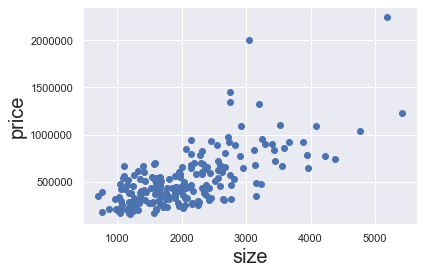

In [10]:
plt.scatter(data['sqft_living'], y)
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()

In [11]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     74.89
Date:                Fri, 25 Sep 2020   Prob (F-statistic):           2.35e-38
Time:                        21:54:10   Log-Likelihood:                -2711.6
No. Observations:                 200   AIC:                             5433.
Df Residuals:                     195   BIC:                             5450.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        6.018e+06   1.05e+06      5.756      0.000    3.96e+06    8.08e+06
sqft_living   133.6612     24.147      5.535      0.000      86.039     181.283
condition   -3.677e+04   2.06e+04     -1.784      0.076   -7.74e+04    3882.942
grade        1.462e+05   2.06e+04      7.094      0.000    1.06e+05    1.87e+05
yr_built    -3439.1723    538.659     -6.385      0.000   -4501.518   -2376.827
==============================================================================
Omnibus:                       95.817   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.887
Skew:                           1.728   Prob(JB):                    1.80e-129
Kurtosis:                      10.695   Cond. No.                     2.27e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

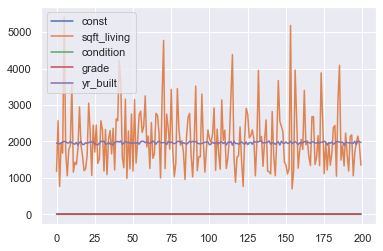

In [13]:
x.plot()